<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Visão Computacional

Referências:
* Dataset: https://www.kaggle.com/competitions/digit-recognizer
* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

## Demonstração

### Importação das bibliotecas

In [3]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns

# Pacotes de Modelagem
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

# Funções adicionais
import preditiva

### Importação da base de dados

In [2]:
df = pd.read_csv('mnist.zip')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
28*28

784

### Separação dos dados da imagem dos Rótulos

In [9]:
x = df.iloc[:,1:].values.astype('float32')
y = df.iloc[:,0].values.astype('int32')

In [11]:
x.shape

(42000, 784)

### Análise Exploratória de Dados

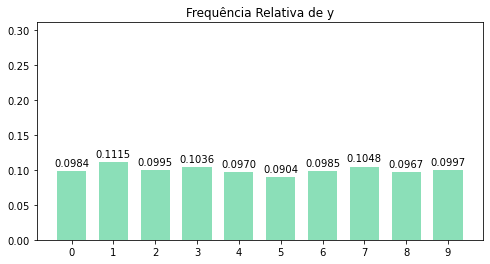

In [13]:
preditiva.cria_grafico_var_qualitativa(preditiva.tabela_bivariada(pd.DataFrame(y, columns=['y']), 'y'))

### Visualização das imagens

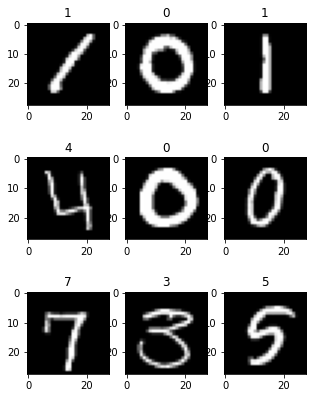

In [14]:
x = x.reshape(x.shape[0], 28, 28)
x.shape

plt.figure(figsize=(5,7))

for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(x[i], cmap=plt.get_cmap('gray'))
    plt.title(y[i])

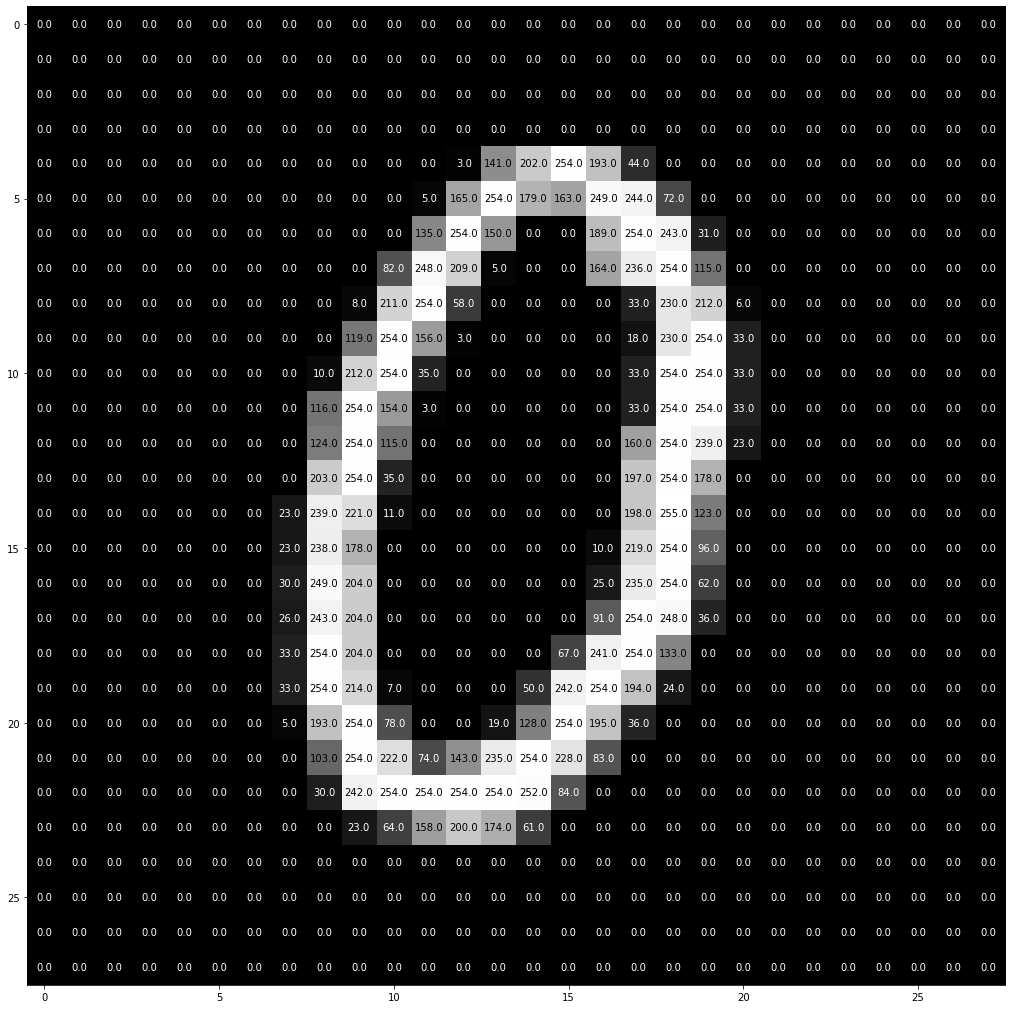

In [15]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

obs = 5
fig = plt.figure(figsize = (18,18)) 
ax = fig.add_subplot(111)
visualize_input(x[obs], ax)

### Pré-processamento

In [16]:
x = x.astype('float32')/255.0

### Separação da base em Treino e Teste

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.5, 
                                                    random_state=42)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [18]:
# Criação das variáveis dummy
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_train.shape

(21000, 10)

## Definição da CNN

In [21]:
model = keras.Sequential()

# 1a Camada: Convolução
model.add(layers.Conv2D(10, kernel_size=5, 
                        activation='relu', 
                        input_shape=(28,28,1)))
model.add(layers.Dropout(0.3))

# 2a Camada: MaxPooling
model.add(layers.MaxPooling2D())

# 3a Camada: Dense / Fully connected / MLP
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(), 
              metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()
print("Input shape ",model.input_shape)
print("Output shape ",model.output_shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                14410     
Total params: 14,670
Trainable params: 14,670
Non-trainable params: 0
_________________________________________________________________
Input shape  (None, 28, 28, 1)
Output shape  (None, 10)


### Treinamento da CNN

In [22]:
cnn_es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience = 10,
    verbose=2,
    mode='min',
    restore_best_weights=True)

historico = model.fit(x=x_train, 
                      y=y_train,
                      epochs=50,
                      batch_size=512,
                      validation_split=0.1,
                      callbacks=cnn_es,
                      verbose=1)

Epoch 1/50
37/37 [==============================] - 2s 15ms/step - loss: 1.9329 - categorical_accuracy: 0.4156 - val_loss: 0.8840 - val_categorical_accuracy: 0.8329
Epoch 2/50
37/37 [==============================] - 0s 10ms/step - loss: 0.5758 - categorical_accuracy: 0.8503 - val_loss: 0.4423 - val_categorical_accuracy: 0.9076
Epoch 3/50
37/37 [==============================] - 1s 18ms/step - loss: 0.3493 - categorical_accuracy: 0.9050 - val_loss: 0.3371 - val_categorical_accuracy: 0.9338
Epoch 4/50
37/37 [==============================] - 0s 11ms/step - loss: 0.2600 - categorical_accuracy: 0.9268 - val_loss: 0.2872 - val_categorical_accuracy: 0.9429
Epoch 5/50
37/37 [==============================] - 0s 11ms/step - loss: 0.2255 - categorical_accuracy: 0.9353 - val_loss: 0.2488 - val_categorical_accuracy: 0.9490
Epoch 6/50
37/37 [==============================] - 0s 10ms/step - loss: 0.2002 - categorical_accuracy: 0.9443 - val_loss: 0.2330 - val_categorical_accuracy: 0.9490
Epoch 7/50

## Avaliação do Desempenho

In [23]:
score, metric_train = model.evaluate(x_train, y_train, verbose=0)
score, metric_test = model.evaluate(x_test, y_test, verbose=0)

print('Desempenho no conjunto de Treino: {:.2%}'.format(metric_train))
print('Desempenho no conjunto de Teste: {:.2%}'.format(metric_test))

Desempenho no conjunto de Treino: 99.18%
Desempenho no conjunto de Teste: 97.88%


In [24]:
historico.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

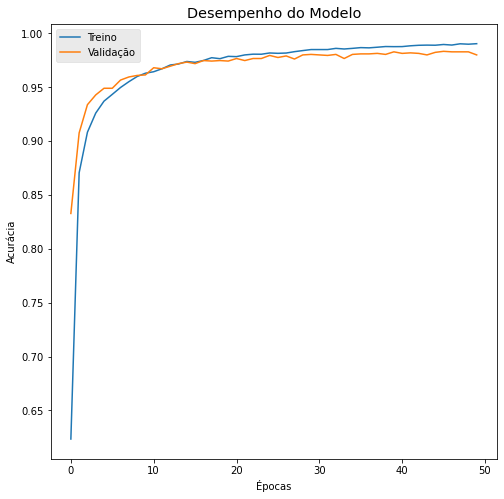

In [25]:
# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('ggplot')
plt.plot(historico.history['categorical_accuracy'])
plt.plot(historico.history['val_categorical_accuracy'])
plt.title('Desempenho do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()